In [1]:
import time
from copy import deepcopy

import IPython.display as IPd
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

In [2]:
from pyloric import simulate, summary_stats

/home/michael/anaconda3/envs/stg-energy/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [16]:
import stg_energy.revision.viz as viz
from stg_energy.common import col, svg
import pandas as pd

# Figure 2

In [4]:
pd.options.display.max_columns=999

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
PANEL_A = "../svg/panel_a.svg"
PANEL_B = "../svg/panel_b.svg"
PANEL_C = "../svg/panel_c.svg"
PANEL_D = "../svg/panel_d.svg"


In [7]:
theta = pd.read_pickle("../../../results/simulation_data_Tube_MLslurm_cluster/close_to_xo_circuit_parameters.pkl")
x = pd.read_pickle("../../../results/simulation_data_Tube_MLslurm_cluster/close_to_xo_simulation_outputs.pkl")
seeds = np.load("../../../results/simulation_data_Tube_MLslurm_cluster/close_to_xo_seeds.npy")

theta_np = theta.to_numpy()
x_np = x.to_numpy()

# Panel A: Histogram for total energy

In [8]:
all_energies_per_spike = x["energies_per_spike"].to_numpy()
all_total_energies = x["energies"].to_numpy()

In [9]:
summed_energies_per_spike = np.sum(np.asarray(all_energies_per_spike), axis=1)
summed_energies_total = np.sum(np.asarray(all_total_energies), axis=1)

# Panel C: trace with highest and lowest energy

In [10]:
inds = np.argsort(summed_energies_total)
sorted_params = theta_np[inds]
sorted_seeds = seeds[inds]
sorted_params_pd = pd.DataFrame(sorted_params, columns=theta.columns)

In [55]:
all_out_targets = []
summstats = []
for seed in range(4):
    out_target = simulate(sorted_params_pd.loc[1500], seed=seed)
    all_out_targets.append(out_target)

In [56]:
time_vec = np.arange(0, 11000, 0.025)

Showing :   3.0 seconds
Scalebar indicates:  50mV


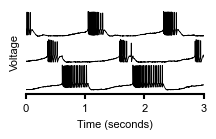

In [63]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    viz.vis_trace(
        all_out_targets[0],
        time_vec,
        figsize=(2.3, 1.1),
    )
    plt.savefig(PANEL_A, facecolor='None', transparent=True)
    plt.show()

Showing :   3.0 seconds
Scalebar indicates:  50mV


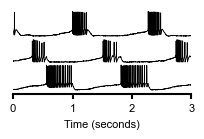

In [64]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    viz.vis_trace(
        all_out_targets[1],
        time_vec,
        figsize=(2.3, 1.1),
        ylabel=False
    )
    plt.savefig(PANEL_B, facecolor='None', transparent=True)
    plt.show()

Showing :   3.0 seconds
Scalebar indicates:  50mV


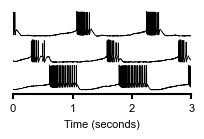

In [65]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    viz.vis_trace(
        all_out_targets[2],
        time_vec,
        figsize=(2.3, 1.1),
        ylabel=False
    )
    plt.savefig(PANEL_C, facecolor='None', transparent=True)
    plt.show()

Showing :   3.0 seconds
Scalebar indicates:  50mV


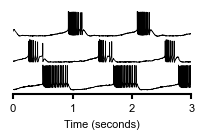

In [66]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    viz.vis_trace(
        all_out_targets[3],
        time_vec,
        figsize=(2.3, 1.1),
        ylabel=False
    )
    plt.savefig(PANEL_D, facecolor='None', transparent=True)
    plt.show()

# Assemble figure

In [67]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [75]:
from svgutils.compose import *
import svgutils.transform as sg

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

f = Figure("20.3cm", "3.2cm",

    Panel(
          SVG(PANEL_A).scale(svg_scale).move(0*factor_svg,0*factor_svg),
    ).move(0*factor_svg, 0*factor_svg),
    Panel(
          SVG(PANEL_B).scale(svg_scale).move(0*factor_svg,0*factor_svg),
    ).move(35*factor_svg, 0*factor_svg),
    Panel(
          SVG(PANEL_C).scale(svg_scale).move(0*factor_svg,0*factor_svg),
    ).move(70*factor_svg, 0*factor_svg),
    Panel(
          SVG(PANEL_D).scale(svg_scale).move(0*factor_svg,0*factor_svg),
    ).move(105*factor_svg, 0*factor_svg),
)

f.save("../fig/fig_revision_narrow_likelihood.svg")
svg('../fig/fig_revision_narrow_likelihood.svg')